In [203]:
def calculate_time_difference(df):
    # Find the last occurrence of the minimum and the first occurrence of the maximum
    last_min_index = df[df['replicas'] == df['replicas'].min()].index[-1]
    first_max_index = df[df['replicas'] == df['replicas'].max()].index[0]

    last_min_time = df.loc[last_min_index, 'time']
    first_max_time = df.loc[first_max_index, 'time']

    # Calculate the time difference
    time_difference = first_max_time - last_min_time
    print(f"Time difference: {time_difference}")
    return time_difference

{'status': 'success', 'data': {'resultType': 'matrix', 'result': [{'metric': {'__name__': 'kube_deployment_status_replicas', 'container': 'kube-state-metrics', 'deployment': 'ros', 'endpoint': 'http', 'instance': '10.32.0.43:8080', 'job': 'kube-state-metrics', 'namespace': 'ros', 'pod': 'prometheus-kube-state-metrics-66f5694654-425n9', 'service': 'prometheus-kube-state-metrics'}, 'values': [[1736094180, '1'], [1736094190, '1'], [1736094200, '1'], [1736094210, '1'], [1736094220, '1'], [1736094230, '1'], [1736094240, '2'], [1736094250, '2'], [1736094260, '2'], [1736094270, '4'], [1736094280, '4'], [1736094290, '4'], [1736094300, '8'], [1736094310, '8'], [1736094320, '8'], [1736094330, '14'], [1736094340, '14'], [1736094350, '14'], [1736094360, '28'], [1736094370, '28'], [1736094380, '28'], [1736094390, '52'], [1736094400, '52'], [1736094410, '52'], [1736094420, '77'], [1736094430, '77'], [1736094440, '77'], [1736094450, '143'], [1736094460, '143'], [1736094470, '143'], [1736094480, '166'

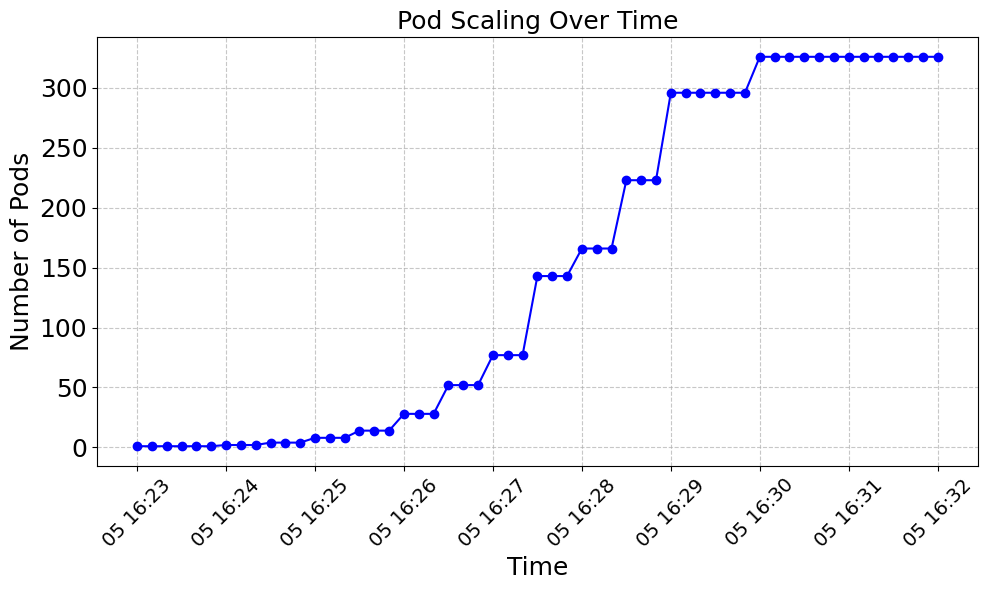

Time difference: 0 days 00:06:10


Timedelta('0 days 00:06:10')

In [209]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Prometheus API endpoint and query
PROMETHEUS_URL = "http://192.168.56.10:30090/api/v1/query_range"
QUERY = 'kube_deployment_status_replicas{deployment="ros",namespace="ros"}'
params = {
    "query": QUERY,
    "start": "2025-01-05T16:20:00Z",  # Start time in ISO8601 format
    "end":   "2025-01-05T16:32:00Z",    # End time in ISO8601 format
    "step": "10s"                     # Query step duration
}

# Fetch data from Prometheus
response = requests.get(PROMETHEUS_URL, params=params)
data = response.json()

print(data)

# Extract and format data
results = data['data']['result'][0]['values']
timestamps, replicas = zip(*[(float(ts), float(val)) for ts, val in results])

# Convert to DataFrame
df = pd.DataFrame({'time': pd.to_datetime(timestamps, unit='s'), 'replicas': replicas})

# Plot the scaling data
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['replicas'], marker='o', linestyle='-', color='b')
plt.title("Pod Scaling Over Time", fontsize=18)
plt.xlabel("Time", fontsize=18)
plt.ylabel("Number of Pods", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=18)
plt.grid(visible=True, linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig('scaling1.pdf', format='pdf', dpi=100, bbox_inches='tight')
plt.show()
calculate_time_difference(df)


{'status': 'success', 'data': {'resultType': 'matrix', 'result': [{'metric': {'__name__': 'kube_deployment_status_replicas', 'container': 'kube-state-metrics', 'deployment': 'ros', 'endpoint': 'http', 'instance': '10.32.0.43:8080', 'job': 'kube-state-metrics', 'namespace': 'ros', 'pod': 'prometheus-kube-state-metrics-66f5694654-425n9', 'service': 'prometheus-kube-state-metrics'}, 'values': [[1736095740, '1'], [1736095750, '1'], [1736095760, '1'], [1736095770, '2'], [1736095780, '2'], [1736095790, '2'], [1736095800, '4'], [1736095810, '4'], [1736095820, '4'], [1736095830, '8'], [1736095840, '8'], [1736095850, '8'], [1736095860, '15'], [1736095870, '15'], [1736095880, '15'], [1736095890, '20'], [1736095900, '20'], [1736095910, '20'], [1736095920, '37'], [1736095930, '37'], [1736095940, '37'], [1736095950, '45'], [1736095960, '45'], [1736095970, '45'], [1736095980, '78'], [1736095990, '78'], [1736096000, '78'], [1736096010, '90'], [1736096020, '90'], [1736096030, '90'], [1736096040, '90']

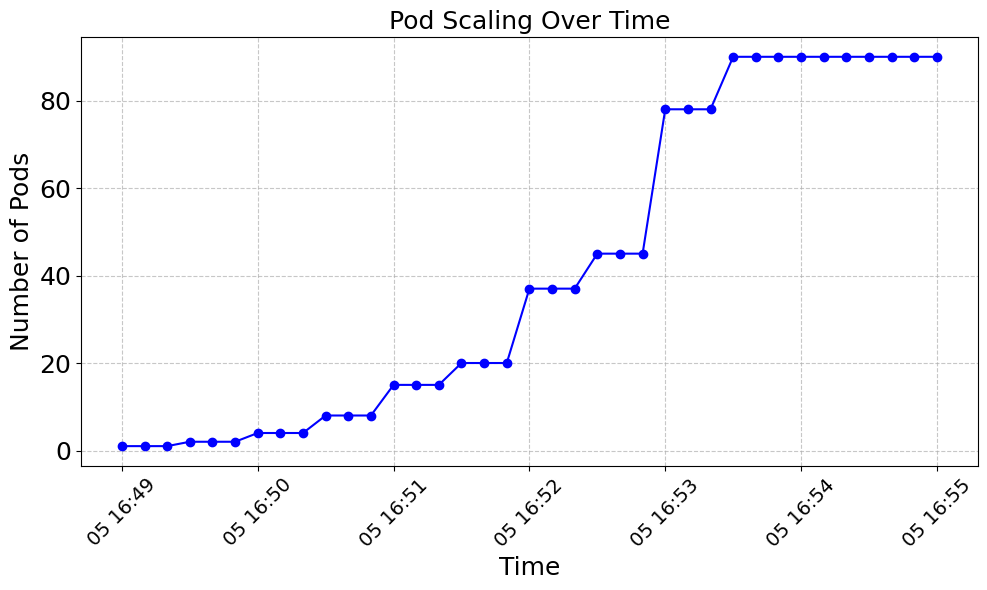

Time difference: 0 days 00:04:10


Timedelta('0 days 00:04:10')

In [210]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Prometheus API endpoint and query
PROMETHEUS_URL = "http://192.168.56.10:30090/api/v1/query_range"
QUERY = 'kube_deployment_status_replicas{deployment="ros",namespace="ros"}'
params = {
    "query": QUERY,
    "start": "2025-01-05T16:49:00Z",  # Start time in ISO8601 format
    "end":   "2025-01-05T16:55:00Z",    # End time in ISO8601 format
    "step": "10s"                     # Query step duration
}

# Fetch data from Prometheus
response = requests.get(PROMETHEUS_URL, params=params)
data = response.json()

print(data)

# Extract and format data
results = data['data']['result'][0]['values']
timestamps, replicas = zip(*[(float(ts), float(val)) for ts, val in results])

# Convert to DataFrame
df = pd.DataFrame({'time': pd.to_datetime(timestamps, unit='s'), 'replicas': replicas})

# Plot the scaling data
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['replicas'], marker='o', linestyle='-', color='b')
plt.title("Pod Scaling Over Time", fontsize=18)
plt.xlabel("Time", fontsize=18)
plt.ylabel("Number of Pods", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=18)
plt.grid(visible=True, linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig('scaling2.pdf', format='pdf', dpi=100, bbox_inches='tight')
plt.show()
calculate_time_difference(df)



{'status': 'success', 'data': {'resultType': 'matrix', 'result': [{'metric': {'__name__': 'kube_deployment_status_replicas', 'container': 'kube-state-metrics', 'deployment': 'ros', 'endpoint': 'http', 'instance': '10.32.0.43:8080', 'job': 'kube-state-metrics', 'namespace': 'ros', 'pod': 'prometheus-kube-state-metrics-66f5694654-425n9', 'service': 'prometheus-kube-state-metrics'}, 'values': [[1736096610, '1'], [1736096620, '1'], [1736096630, '1'], [1736096640, '2'], [1736096650, '2'], [1736096660, '2'], [1736096670, '2'], [1736096680, '2'], [1736096690, '2'], [1736096700, '3'], [1736096710, '3'], [1736096720, '3'], [1736096730, '4'], [1736096740, '4'], [1736096750, '4'], [1736096760, '5'], [1736096770, '5'], [1736096780, '5'], [1736096790, '6'], [1736096800, '6'], [1736096810, '6'], [1736096820, '6'], [1736096830, '6'], [1736096840, '6'], [1736096850, '7'], [1736096860, '7'], [1736096870, '7'], [1736096880, '8'], [1736096890, '8'], [1736096900, '8'], [1736096910, '10'], [1736096920, '10

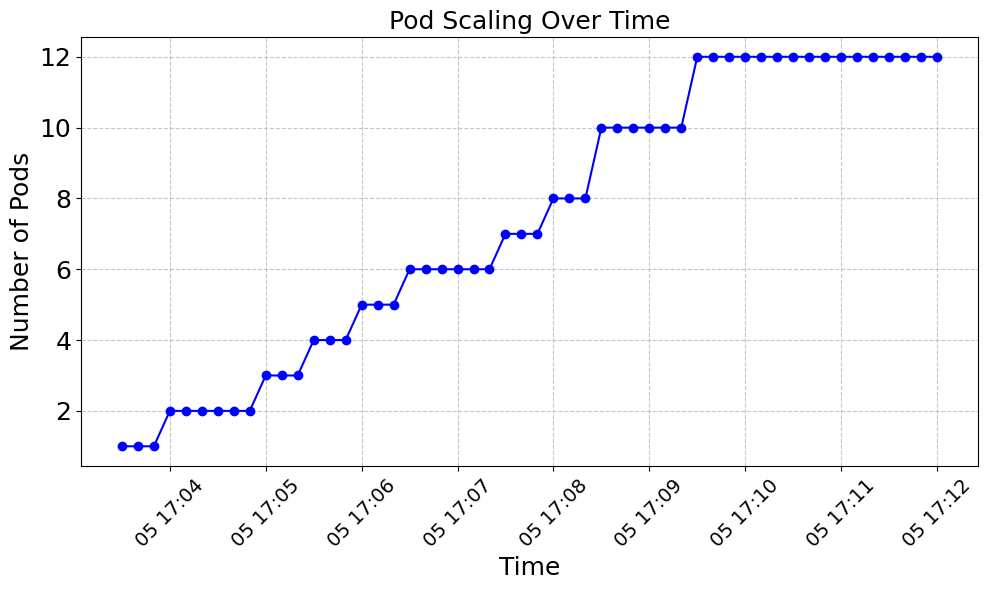

Time difference: 0 days 00:05:40


Timedelta('0 days 00:05:40')

In [211]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Prometheus API endpoint and query
PROMETHEUS_URL = "http://192.168.56.10:30090/api/v1/query_range"
QUERY = 'kube_deployment_status_replicas{deployment="ros",namespace="ros"}'
params = {
    "query": QUERY,
    "start": "2025-01-05T17:00:00Z",  # Start time in ISO8601 format
    "end":   "2025-01-05T17:12:00Z",    # End time in ISO8601 format
    "step":  "10s"                     # Query step duration
}

# Fetch data from Prometheus
response = requests.get(PROMETHEUS_URL, params=params)
data = response.json()

print(data)

# Extract and format data
results = data['data']['result'][0]['values']
timestamps, replicas = zip(*[(float(ts), float(val)) for ts, val in results])

# Convert to DataFrame
df = pd.DataFrame({'time': pd.to_datetime(timestamps, unit='s'), 'replicas': replicas})

# Plot the scaling data
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['replicas'], marker='o', linestyle='-', color='b')
plt.title("Pod Scaling Over Time", fontsize=18)
plt.xlabel("Time", fontsize=18)
plt.ylabel("Number of Pods", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=18)
plt.grid(visible=True, linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig('scaling3.pdf', format='pdf', dpi=100, bbox_inches='tight')
plt.show()

calculate_time_difference(df)




In [2]:
from prometheus_api_client import PrometheusConnect
from datetime import datetime, timedelta  
import pandas as pd 
import yaml
import json
prom = PrometheusConnect(url ="http://192.168.56.10:30090", disable_ssl=True)
prom

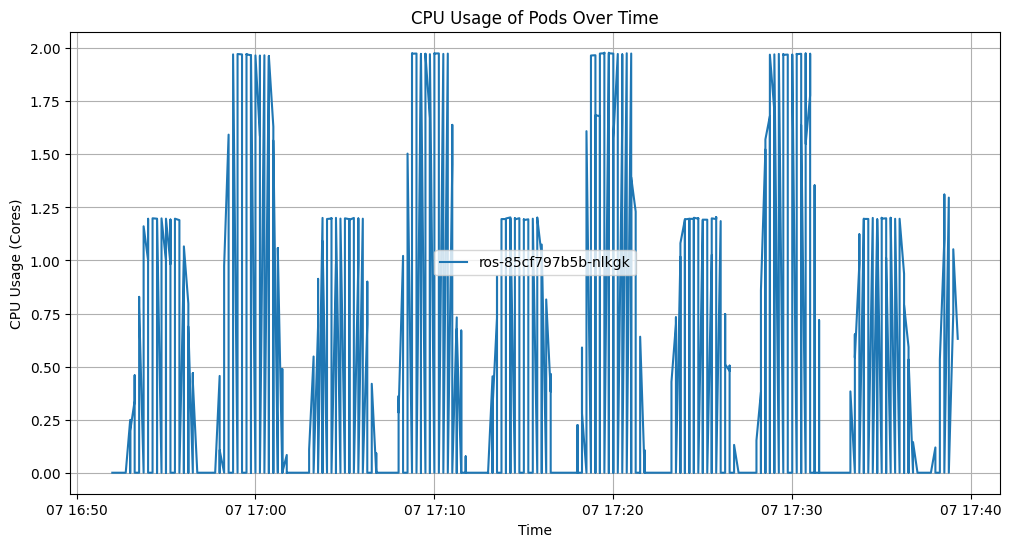

,time,cpu_usage,pod
41,2025-01-07 16:52:00,0.000000,ros-85cf797b5b-nlkgk
382,2025-01-07 16:52:00,0.000000,ros-85cf797b5b-nlkgk
192,2025-01-07 16:52:00,0.000000,ros-85cf797b5b-nlkgk
42,2025-01-07 16:52:15,0.000000,ros-85cf797b5b-nlkgk
193,2025-01-07 16:52:15,0.000000,ros-85cf797b5b-nlkgk
...,...,...,...
379,2025-01-07 17:38:45,1.260042,ros-85cf797b5b-nlkgk
569,2025-01-07 17:38:45,0.000000,ros-85cf797b5b-nlkgk
380,2025-01-07 17:39:00,0.755072,ros-85cf797b5b-nlkgk
191,2025-01-07 17:39:00,1.052924,ros-85cf797b5b-nlkgk


In [82]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Prometheus query URL
prometheus_url = "http://192.168.56.10:30090/api/v1/query_range"
query = 'rate(container_cpu_usage_seconds_total{namespace="ros", pod=~"ros-.*"}[1m])'

# Query parameters
params = {
    "query": query,
    "start": "2025-01-07T16:52:00Z",  # Adjust to your start time
    "end": "2025-01-07T23:30:00Z",    # Adjust to your end time
    "step": "15s"                     # Query interval
}

# Make the request
response = requests.get(prometheus_url, params=params)
data = response.json()

# Parse the results
results = data['data']['result']
time_series = []
for result in results:
    pod_name = result['metric']['pod']
    values = result['values']
    for timestamp, value in values:
        time_series.append({"time": float(timestamp), "cpu_usage": float(value), "pod": pod_name})

# Convert to DataFrame
df = pd.DataFrame(time_series)



df['time'] = pd.to_datetime(df['time'], unit='s')  # Convert to readable timestamps
# Sort by time
df = df.sort_values(by='time')

# Plot CPU usage over time
plt.figure(figsize=(12, 6))
# plt.plot(df['time'], df['cpu_usage'], marker='o', linestyle='-', color='b')
for pod_name, group in df.groupby("pod"):
    plt.plot(group['time'], group['cpu_usage'], label=pod_name)

plt.title("CPU Usage of Pods Over Time")
plt.xlabel("Time")
plt.ylabel("CPU Usage (Cores)")
plt.legend()
plt.grid(True)
plt.show()
df

,time,cpu_usage,pod
41,2025-01-07 16:52:00,0.000000,ros-85cf797b5b-nlkgk
176,2025-01-07 16:52:00,0.000000,ros-85cf797b5b-nlkgk
349,2025-01-07 16:52:00,0.000000,ros-85cf797b5b-nlkgk
42,2025-01-07 16:52:15,0.000000,ros-85cf797b5b-nlkgk
177,2025-01-07 16:52:15,0.000000,ros-85cf797b5b-nlkgk
...,...,...,...
347,2025-01-07 17:34:45,0.899083,ros-85cf797b5b-nlkgk
520,2025-01-07 17:34:45,0.000000,ros-85cf797b5b-nlkgk
348,2025-01-07 17:35:00,0.600477,ros-85cf797b5b-nlkgk
175,2025-01-07 17:35:00,0.778498,ros-85cf797b5b-nlkgk


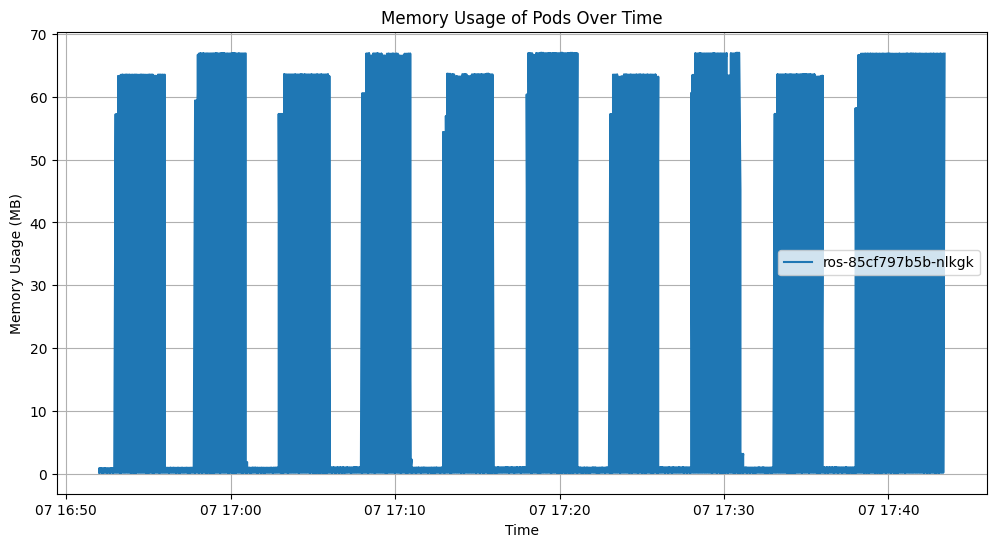

In [81]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Prometheus query URL
prometheus_url = "http://192.168.56.10:30090/api/v1/query_range"
query = 'container_memory_working_set_bytes{namespace="ros", pod=~"ros-.*"}'

# Query parameters
params = {
    "query": query,
    "start": "2025-01-07T16:52:00Z",  # Adjust to your start time
    "end": "2025-01-07T23:30:00Z",    # Adjust to your end time
    "step": "5s"                     # Query interval
}

# Make the request
response = requests.get(prometheus_url, params=params)
data = response.json()

# Parse the results
results = data['data']['result']
time_series = []
for result in results:
    pod_name = result['metric']['pod']
    values = result['values']
    for timestamp, value in values:
        time_series.append({"time": float(timestamp), "memory_usage": float(value) / (1024 * 1024), "pod": pod_name})  # Convert to MB

# Convert to DataFrame
df = pd.DataFrame(time_series)
df['time'] = pd.to_datetime(df['time'], unit='s')  # Convert to readable timestamps
# Sort by time
df = df.sort_values(by='time')

# Plot Memory usage over time
plt.figure(figsize=(12, 6))
for pod_name, group in df.groupby("pod"):
    plt.plot(group['time'], group['memory_usage'], label=pod_name)

plt.title("Memory Usage of Pods Over Time")
plt.xlabel("Time")
plt.ylabel("Memory Usage (MB)")
plt.legend()
plt.grid(True)
plt.show()


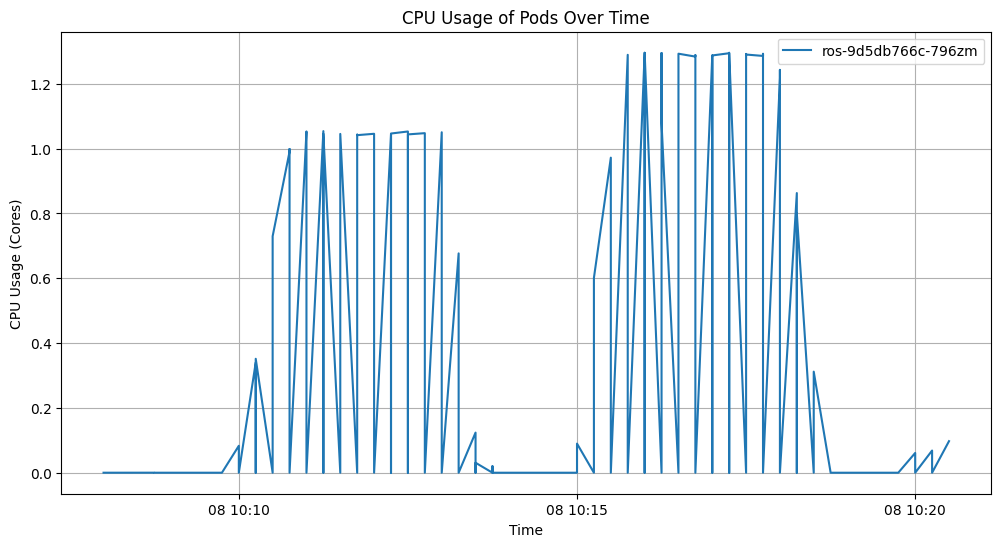

,time,cpu_usage,pod
98,2025-01-08 10:08:00,0.000036,ros-9d5db766c-796zm
0,2025-01-08 10:08:15,0.000116,ros-9d5db766c-796zm
99,2025-01-08 10:08:15,0.000041,ros-9d5db766c-796zm
1,2025-01-08 10:08:30,0.000134,ros-9d5db766c-796zm
50,2025-01-08 10:08:30,0.000000,ros-9d5db766c-796zm
...,...,...,...
146,2025-01-08 10:20:00,0.000000,ros-9d5db766c-796zm
48,2025-01-08 10:20:15,0.068429,ros-9d5db766c-796zm
97,2025-01-08 10:20:15,0.000000,ros-9d5db766c-796zm
147,2025-01-08 10:20:15,0.000000,ros-9d5db766c-796zm


In [17]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Prometheus query URL
prometheus_url = "http://192.168.56.10:30090/api/v1/query_range"
query = 'rate(container_cpu_usage_seconds_total{namespace="ros", pod=~"ros-.*"}[1m])'

# Query parameters
params = {
    "query": query,
    "start": "2025-01-08T10:05:00Z",  # Adjust to your start time
    "end":   "2025-01-08T23:30:00Z",    # Adjust to your end time
    "step": "15s"                     # Query interval
}

# Make the request
response = requests.get(prometheus_url, params=params)
data = response.json()

# Parse the results
results = data['data']['result']
time_series = []
for result in results:
    pod_name = result['metric']['pod']
    values = result['values']
    for timestamp, value in values:
        time_series.append({"time": float(timestamp), "cpu_usage": float(value), "pod": pod_name})

# Convert to DataFrame
df = pd.DataFrame(time_series)



df['time'] = pd.to_datetime(df['time'], unit='s')  # Convert to readable timestamps
# Sort by time
df = df.sort_values(by='time')

# Plot CPU usage over time
plt.figure(figsize=(12, 6))
# plt.plot(df['time'], df['cpu_usage'], marker='o', linestyle='-', color='b')
for pod_name, group in df.groupby("pod"):
    plt.plot(group['time'], group['cpu_usage'], label=pod_name)

plt.title("CPU Usage of Pods Over Time")
plt.xlabel("Time")
plt.ylabel("CPU Usage (Cores)")
plt.legend()
plt.grid(True)
plt.show()
df

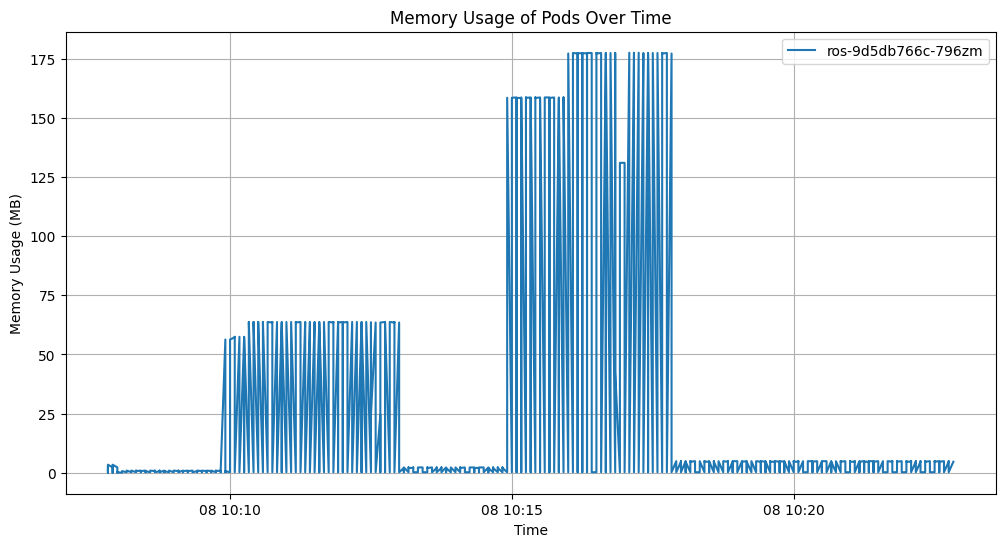

In [16]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Prometheus query URL
prometheus_url = "http://192.168.56.10:30090/api/v1/query_range"
query = 'container_memory_working_set_bytes{namespace="ros", pod=~"ros-.*"}'

# Query parameters
params = {
    "query": query,
    "start": "2025-01-08T10:05:00Z",  # Adjust to your start time
    "end":   "2025-01-08T23:30:00Z",    # Adjust to your end time
    "step": "5s"                     # Query interval
}

# Make the request
response = requests.get(prometheus_url, params=params)
data = response.json()

# Parse the results
results = data['data']['result']
time_series = []
for result in results:
    pod_name = result['metric']['pod']
    values = result['values']
    for timestamp, value in values:
        time_series.append({"time": float(timestamp), "memory_usage": float(value) / (1024 * 1024), "pod": pod_name})  # Convert to MB

# Convert to DataFrame
df = pd.DataFrame(time_series)
df['time'] = pd.to_datetime(df['time'], unit='s')  # Convert to readable timestamps
# Sort by time
df = df.sort_values(by='time')

# Plot Memory usage over time
plt.figure(figsize=(12, 6))
for pod_name, group in df.groupby("pod"):
    plt.plot(group['time'], group['memory_usage'], label=pod_name)

plt.title("Memory Usage of Pods Over Time")
plt.xlabel("Time")
plt.ylabel("Memory Usage (MB)")
plt.legend()
plt.grid(True)
plt.show()





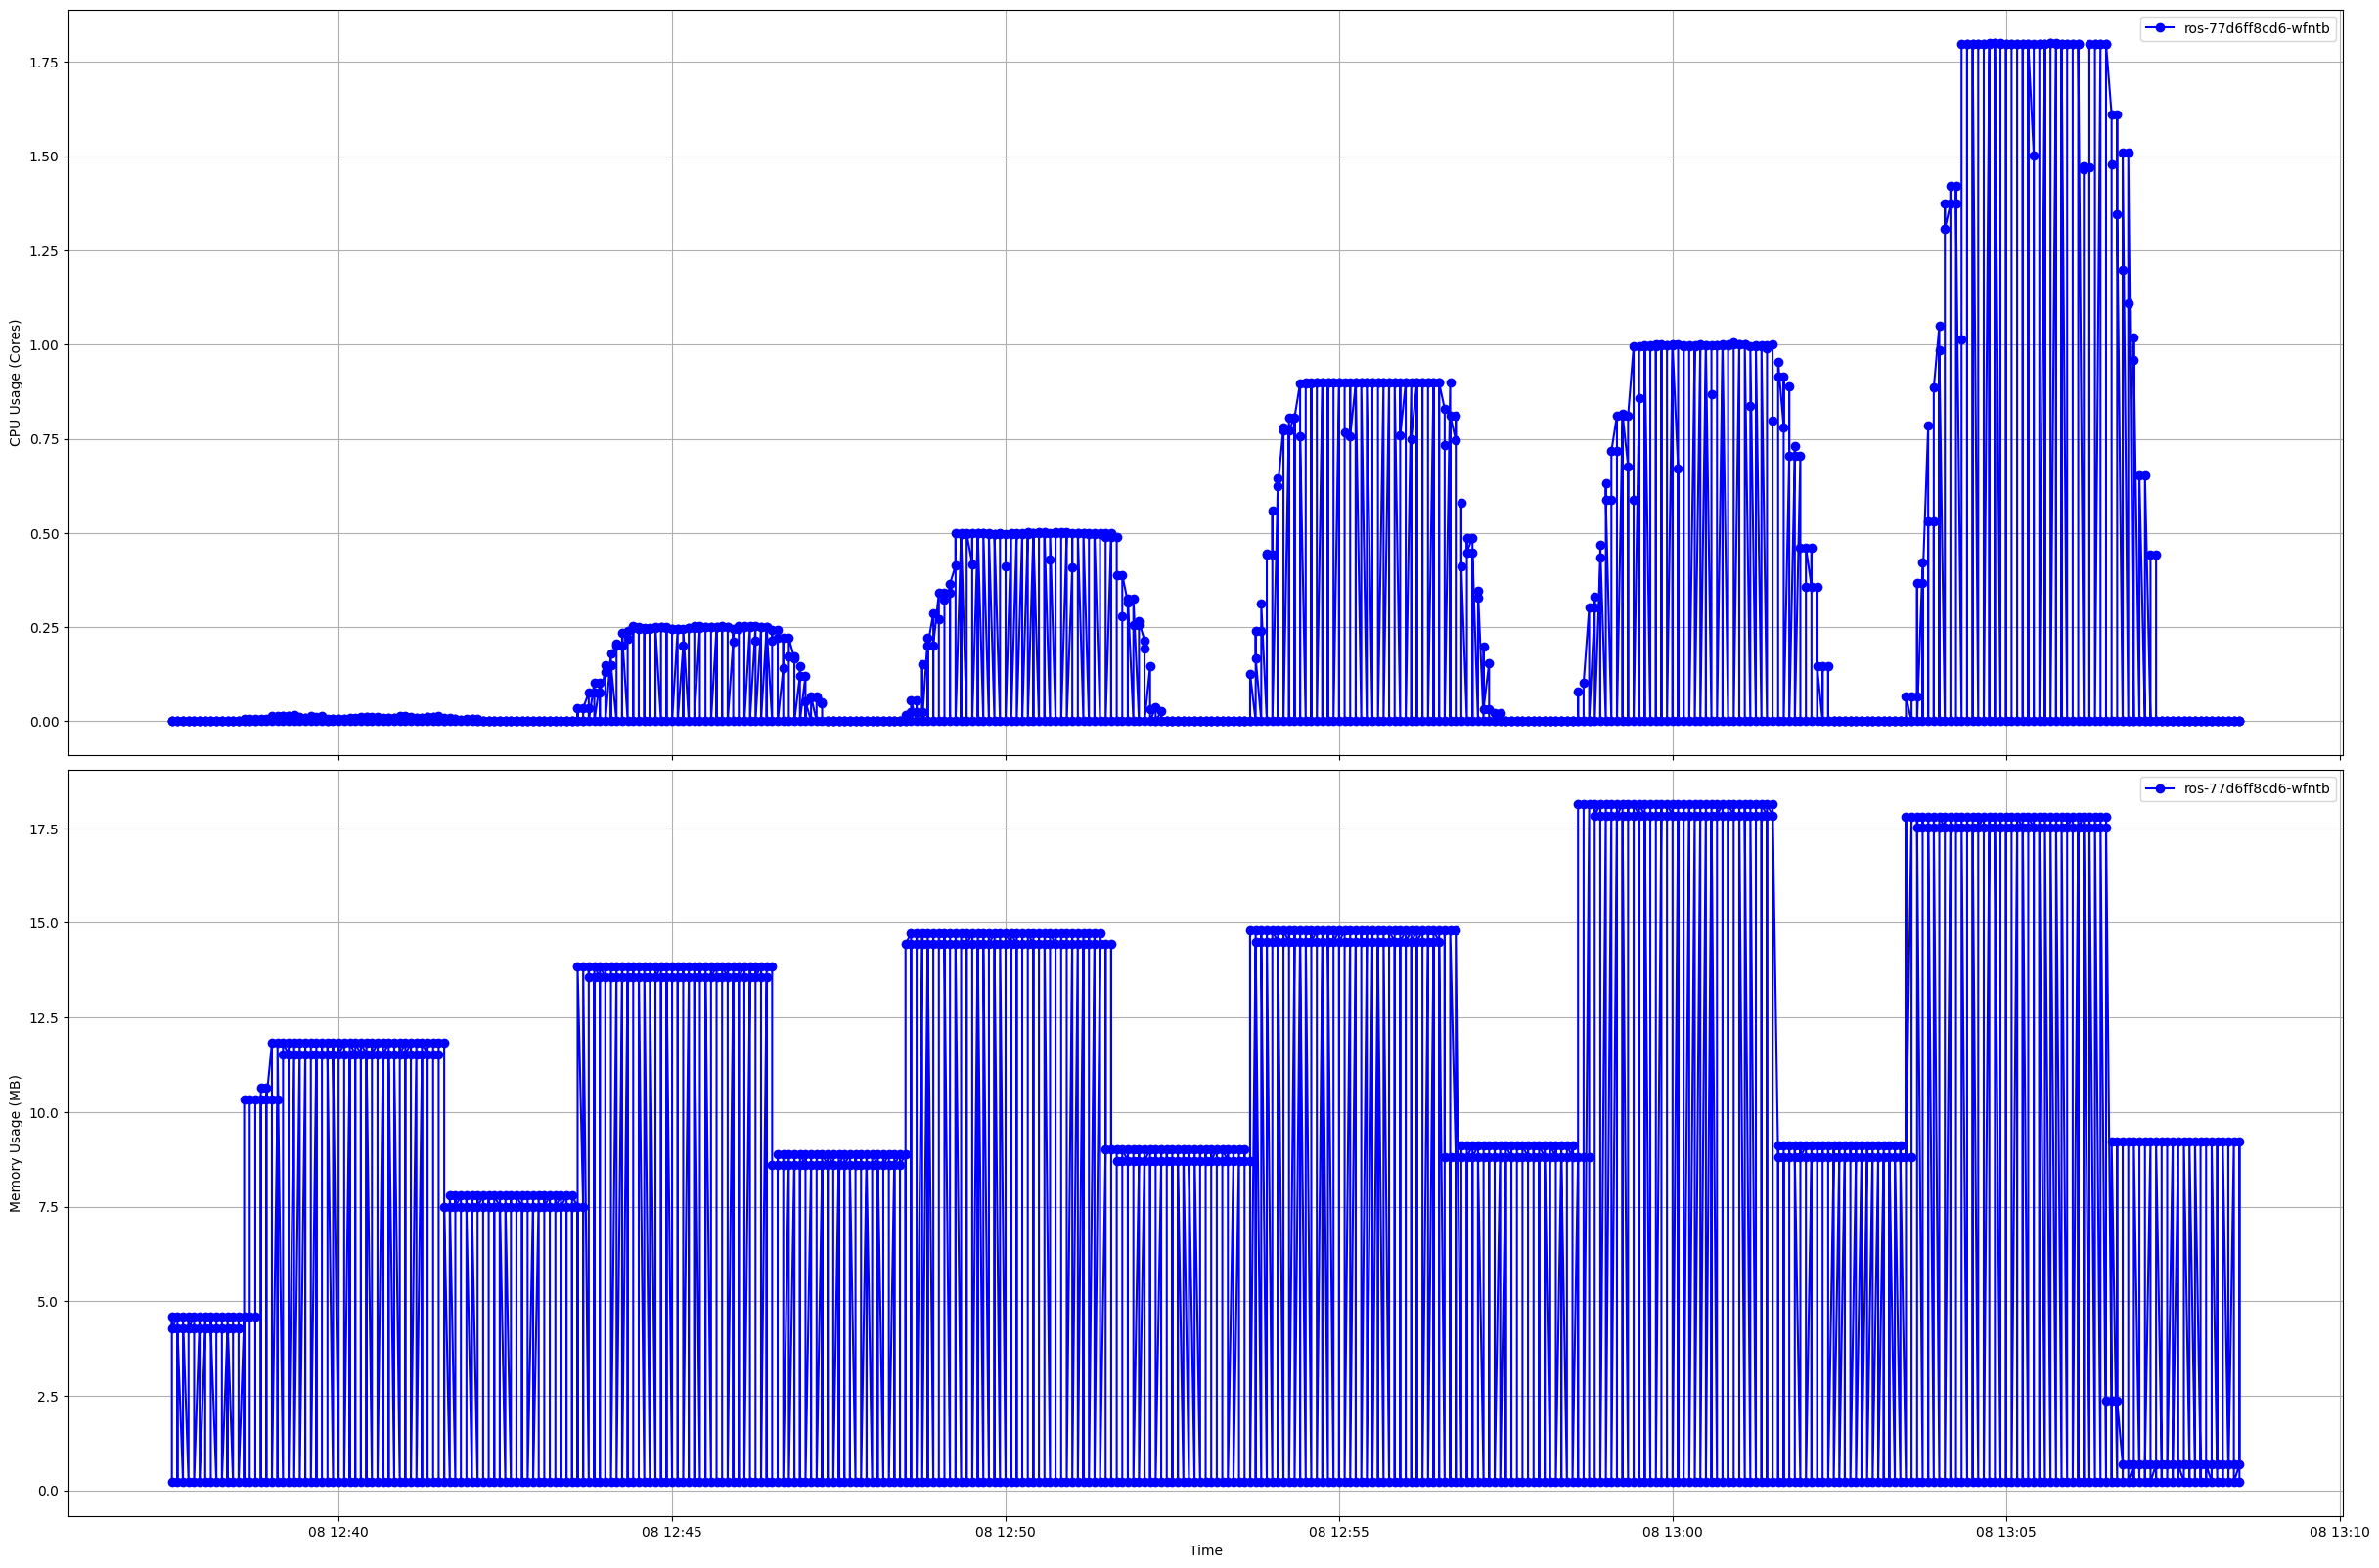

In [155]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Prometheus query URL
prometheus_url = "http://192.168.56.10:30090/api/v1/query_range"




query_mem = 'container_memory_working_set_bytes{namespace="ros", pod=~"ros-.*"}'
query_cpu = 'rate(container_cpu_usage_seconds_total{namespace="ros", pod=~"ros-.*"}[1m])'

start = "2025-01-08T12:37:30Z",  # Adjust to your start time
end =   "2025-01-08T13:08:30Z",    # Adjust to your end time
step =  "5s" # Query interval
# Query parameters
params_mem = {"query": query_mem, "start": start, "end":  end, "step":  step}
params_cpu = {"query": query_cpu, "start": start, "end":  end, "step":  step}

# Make the request
data_mem = requests.get(prometheus_url, params=params_mem).json()
data_cpu = requests.get(prometheus_url, params=params_cpu).json()

# Parse the results
results_mem = data_mem['data']['result']
results_cpu = data_cpu['data']['result']

time_series_mem = []
time_series_cpu = []



for result_mem in results_mem:
    pod_name_mem = result_mem['metric']['pod']
    values_mem = result_mem['values']
    for timestamp_mem, value_mem in values_mem:
        time_series_mem.append({"time": float(timestamp_mem), "memory_usage": float(value_mem) / (1024 * 1024), "pod": pod_name_mem})  # Convert to MB

for result_cpu in results_cpu:
    pod_name_cpu = result_cpu['metric']['pod']
    values_cpu = result_cpu['values']
    for timestamp_cpu, value_cpu in values_cpu:
        time_series_cpu.append({"time": float(timestamp_cpu), "cpu_usage": float(value_cpu), "pod": pod_name_cpu})




# Convert to DataFrame
df_mem = pd.DataFrame(time_series_mem)
df_cpu = pd.DataFrame(time_series_cpu)

df_mem['time'] = pd.to_datetime(df_mem['time'], unit='s')  # Convert to readable timestamps
df_cpu['time'] = pd.to_datetime(df_cpu['time'], unit='s')  # Convert to readable timestamps

# Sort by time
df_mem = df_mem.sort_values(by='time')
df_cpu = df_cpu.sort_values(by='time')

fig, ax = plt.subplots(2, 1, figsize=(30, 20), sharex=True)


for pod_name_cpu, group_cpu in df_cpu.groupby("pod"):
    ax[0].plot(group_cpu['time'], group_cpu['cpu_usage'], label=pod_name_cpu, marker='o', linestyle='-', color='b')
for pod_name_mem, group_mem in df_mem.groupby("pod"):
    ax[1].plot(group_mem['time'], group_mem['memory_usage'], label=pod_name_mem, marker='o', linestyle='-', color='b')
# ax[0].set_title("Memory Usage of Pods Over Time")
# ax[1].set_title("CPU Usage of Pods Over Time")
ax[1].set_xlabel("Time")


ax[0].set_ylabel("CPU Usage (Cores)")
ax[1].set_ylabel("Memory Usage (MB)")


for i in range(2):
    ax[i].legend()
    ax[i].grid(True)

plt.subplots_adjust(hspace=0.02) 
# save the plot
# plt.savefig('vpa_memory_cpu_usage.pdf', format='pdf', dpi=100, bbox_inches='tight')
plt.show()


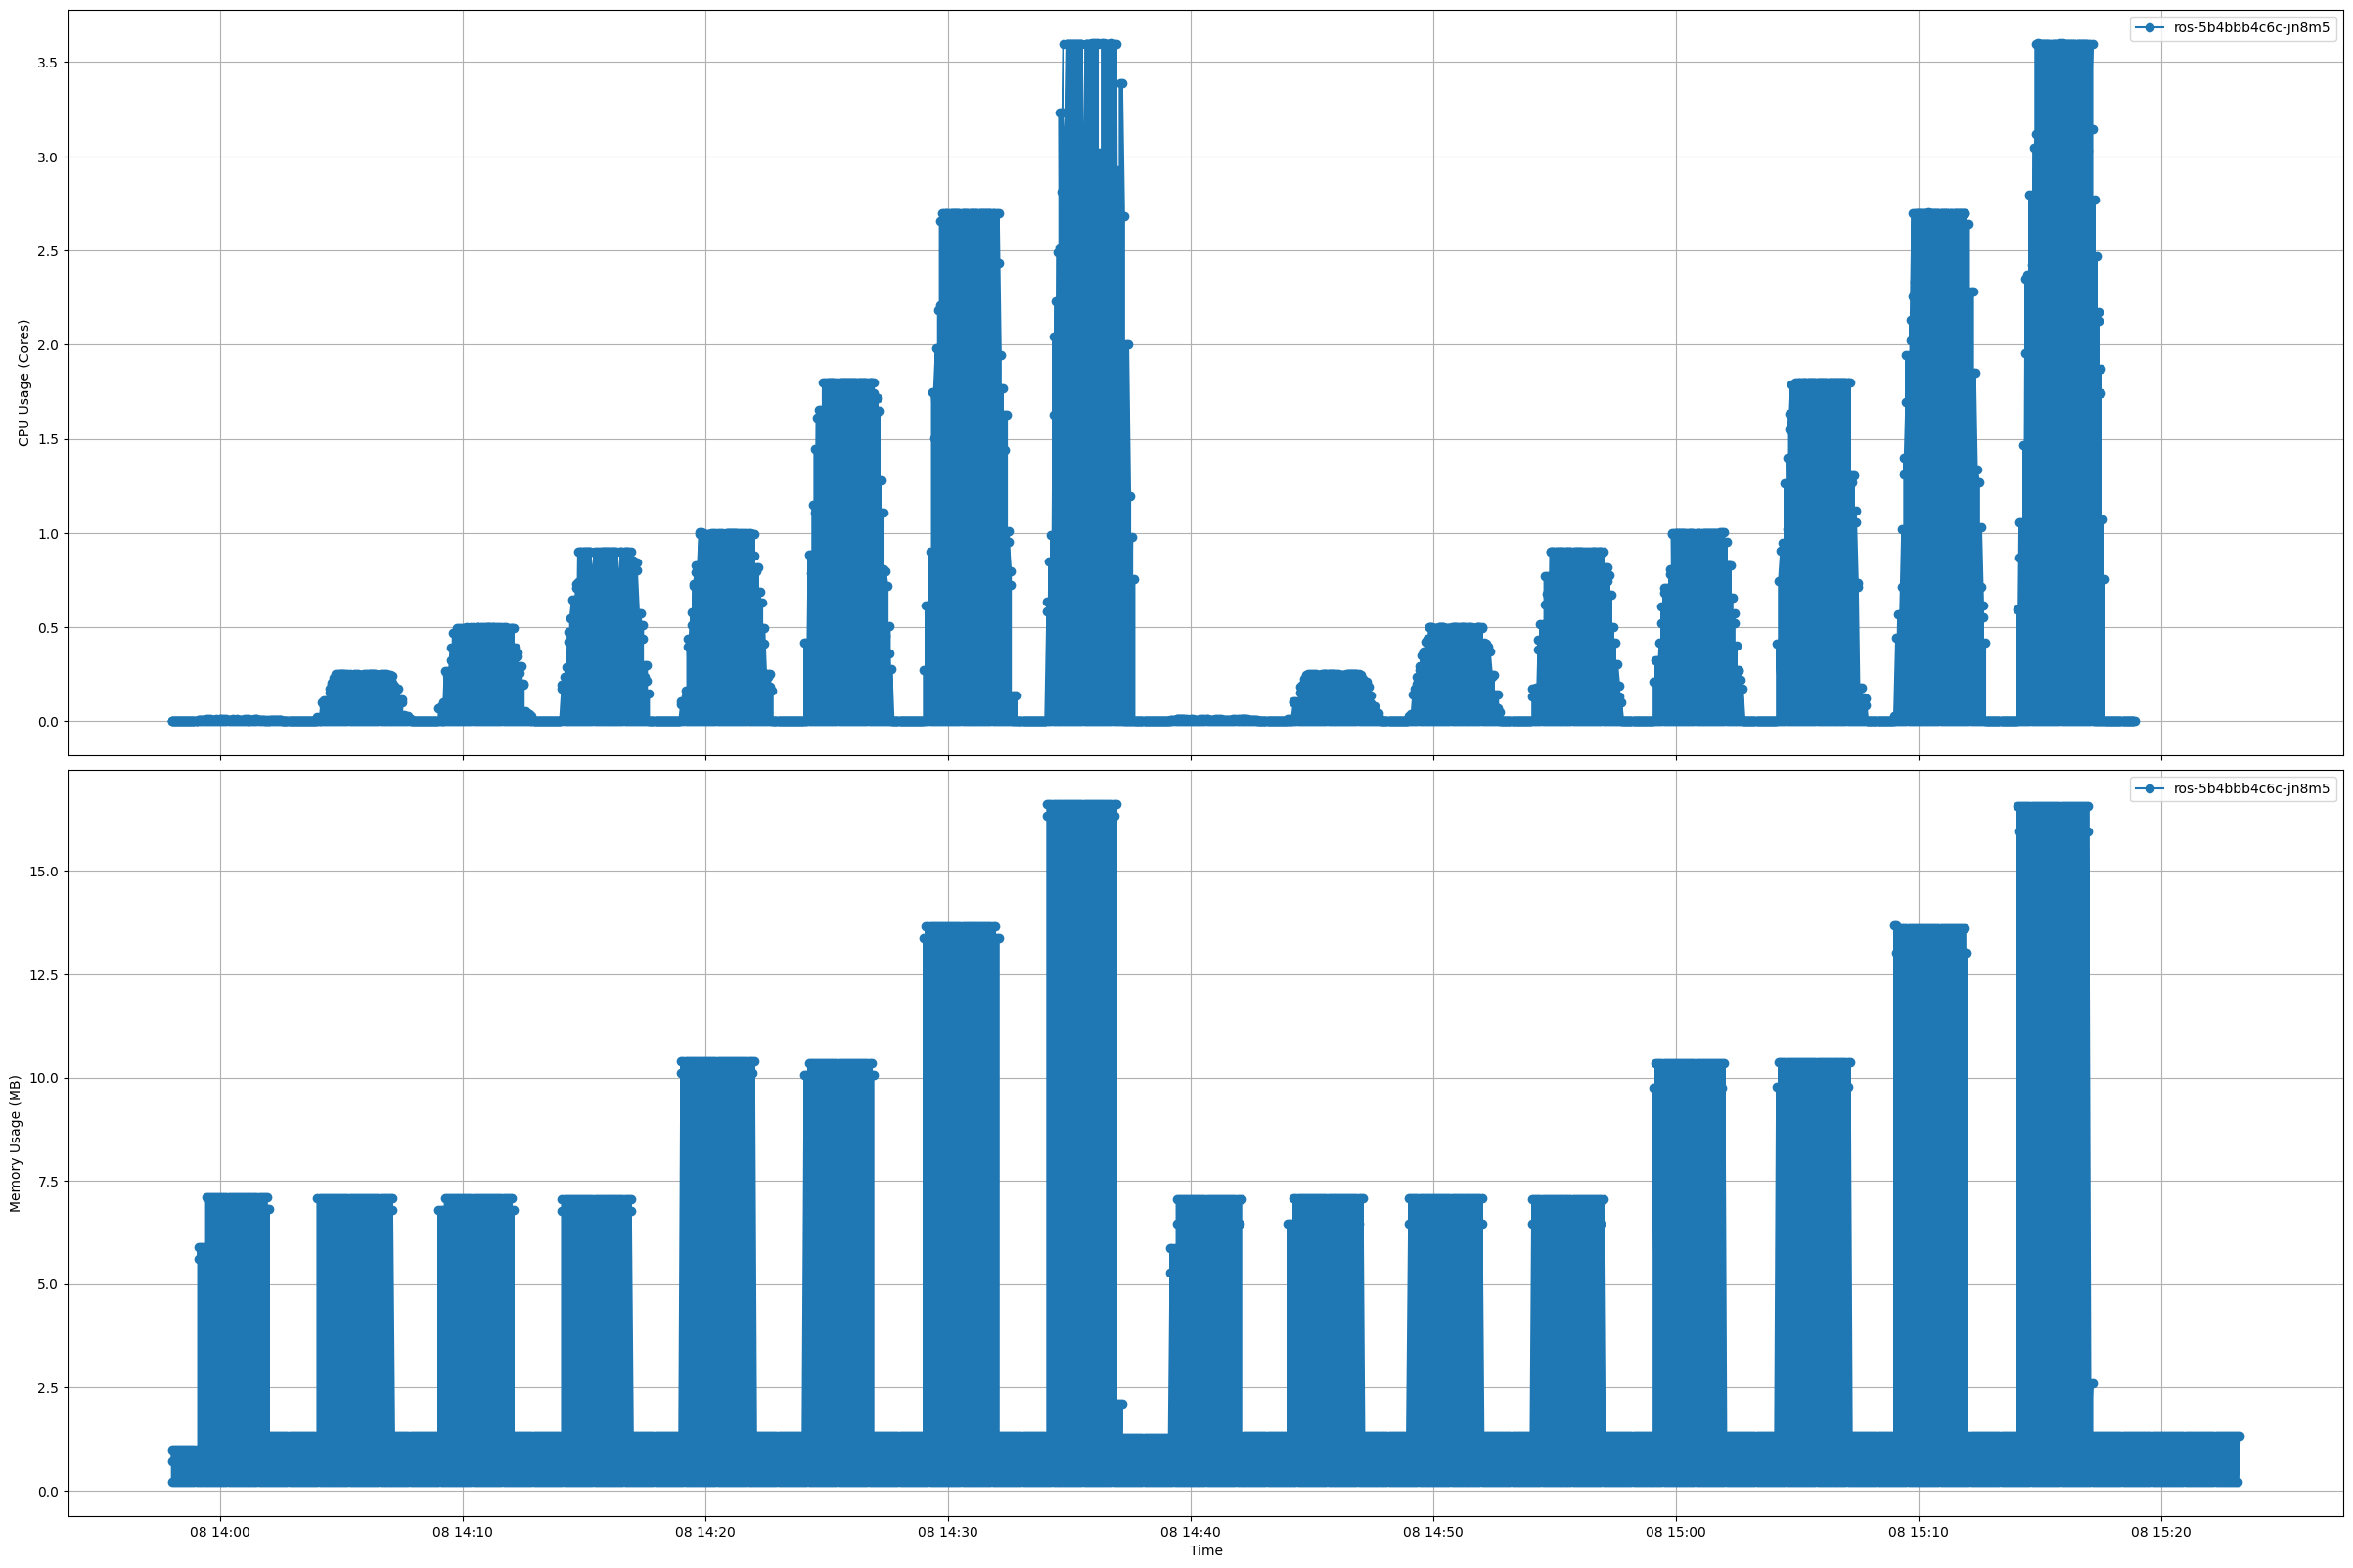

In [203]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Prometheus query URL
prometheus_url = "http://192.168.56.10:30090/api/v1/query_range"




query_mem = 'container_memory_working_set_bytes{namespace="ros", pod=~"ros-.*"}'
query_cpu = 'rate(container_cpu_usage_seconds_total{namespace="ros", pod=~"ros-.*"}[1m])'

start = "2025-01-08T13:58:00Z",  # Adjust to your start time
end =   "2025-01-08T23:00:00Z",    # Adjust to your end time
step =  "5s" # Query interval
# Query parameters
params_mem = {"query": query_mem, "start": start, "end":  end, "step":  step}
params_cpu = {"query": query_cpu, "start": start, "end":  end, "step":  step}

# Make the request
data_mem = requests.get(prometheus_url, params=params_mem).json()
data_cpu = requests.get(prometheus_url, params=params_cpu).json()

# Parse the results
results_mem = data_mem['data']['result']
results_cpu = data_cpu['data']['result']

time_series_mem = []
time_series_cpu = []



for result_mem in results_mem:
    pod_name_mem = result_mem['metric']['pod']
    values_mem = result_mem['values']
    for timestamp_mem, value_mem in values_mem:
        time_series_mem.append({"time": float(timestamp_mem), "memory_usage": float(value_mem) / (1024 * 1024), "pod": pod_name_mem})  # Convert to MB

for result_cpu in results_cpu:
    pod_name_cpu = result_cpu['metric']['pod']
    values_cpu = result_cpu['values']
    for timestamp_cpu, value_cpu in values_cpu:
        time_series_cpu.append({"time": float(timestamp_cpu), "cpu_usage": float(value_cpu), "pod": pod_name_cpu})




# Convert to DataFrame
df_mem = pd.DataFrame(time_series_mem)
df_cpu = pd.DataFrame(time_series_cpu)

df_mem['time'] = pd.to_datetime(df_mem['time'], unit='s')  # Convert to readable timestamps
df_cpu['time'] = pd.to_datetime(df_cpu['time'], unit='s')  # Convert to readable timestamps

# Sort by time
df_mem = df_mem.sort_values(by='time')
df_cpu = df_cpu.sort_values(by='time')

fig, ax = plt.subplots(2, 1, figsize=(30, 20), sharex=True)


for pod_name_cpu, group_cpu in df_cpu.groupby("pod"):
    ax[0].plot(group_cpu['time'], group_cpu['cpu_usage'], label=pod_name_cpu, marker='o', linestyle='-')
for pod_name_mem, group_mem in df_mem.groupby("pod"):
    ax[1].plot(group_mem['time'], group_mem['memory_usage'], label=pod_name_mem, marker='o', linestyle='-')
# ax[0].set_title("Memory Usage of Pods Over Time")
# ax[1].set_title("CPU Usage of Pods Over Time")
ax[1].set_xlabel("Time")


ax[0].set_ylabel("CPU Usage (Cores)")
ax[1].set_ylabel("Memory Usage (MB)")

for i in range(2):
    ax[i].legend()
    ax[i].grid(True)

plt.subplots_adjust(hspace=0.02) 
# save the plot
# plt.savefig('vpa_memory_cpu_usage.pdf', format='pdf', dpi=100, bbox_inches='tight')
plt.show()


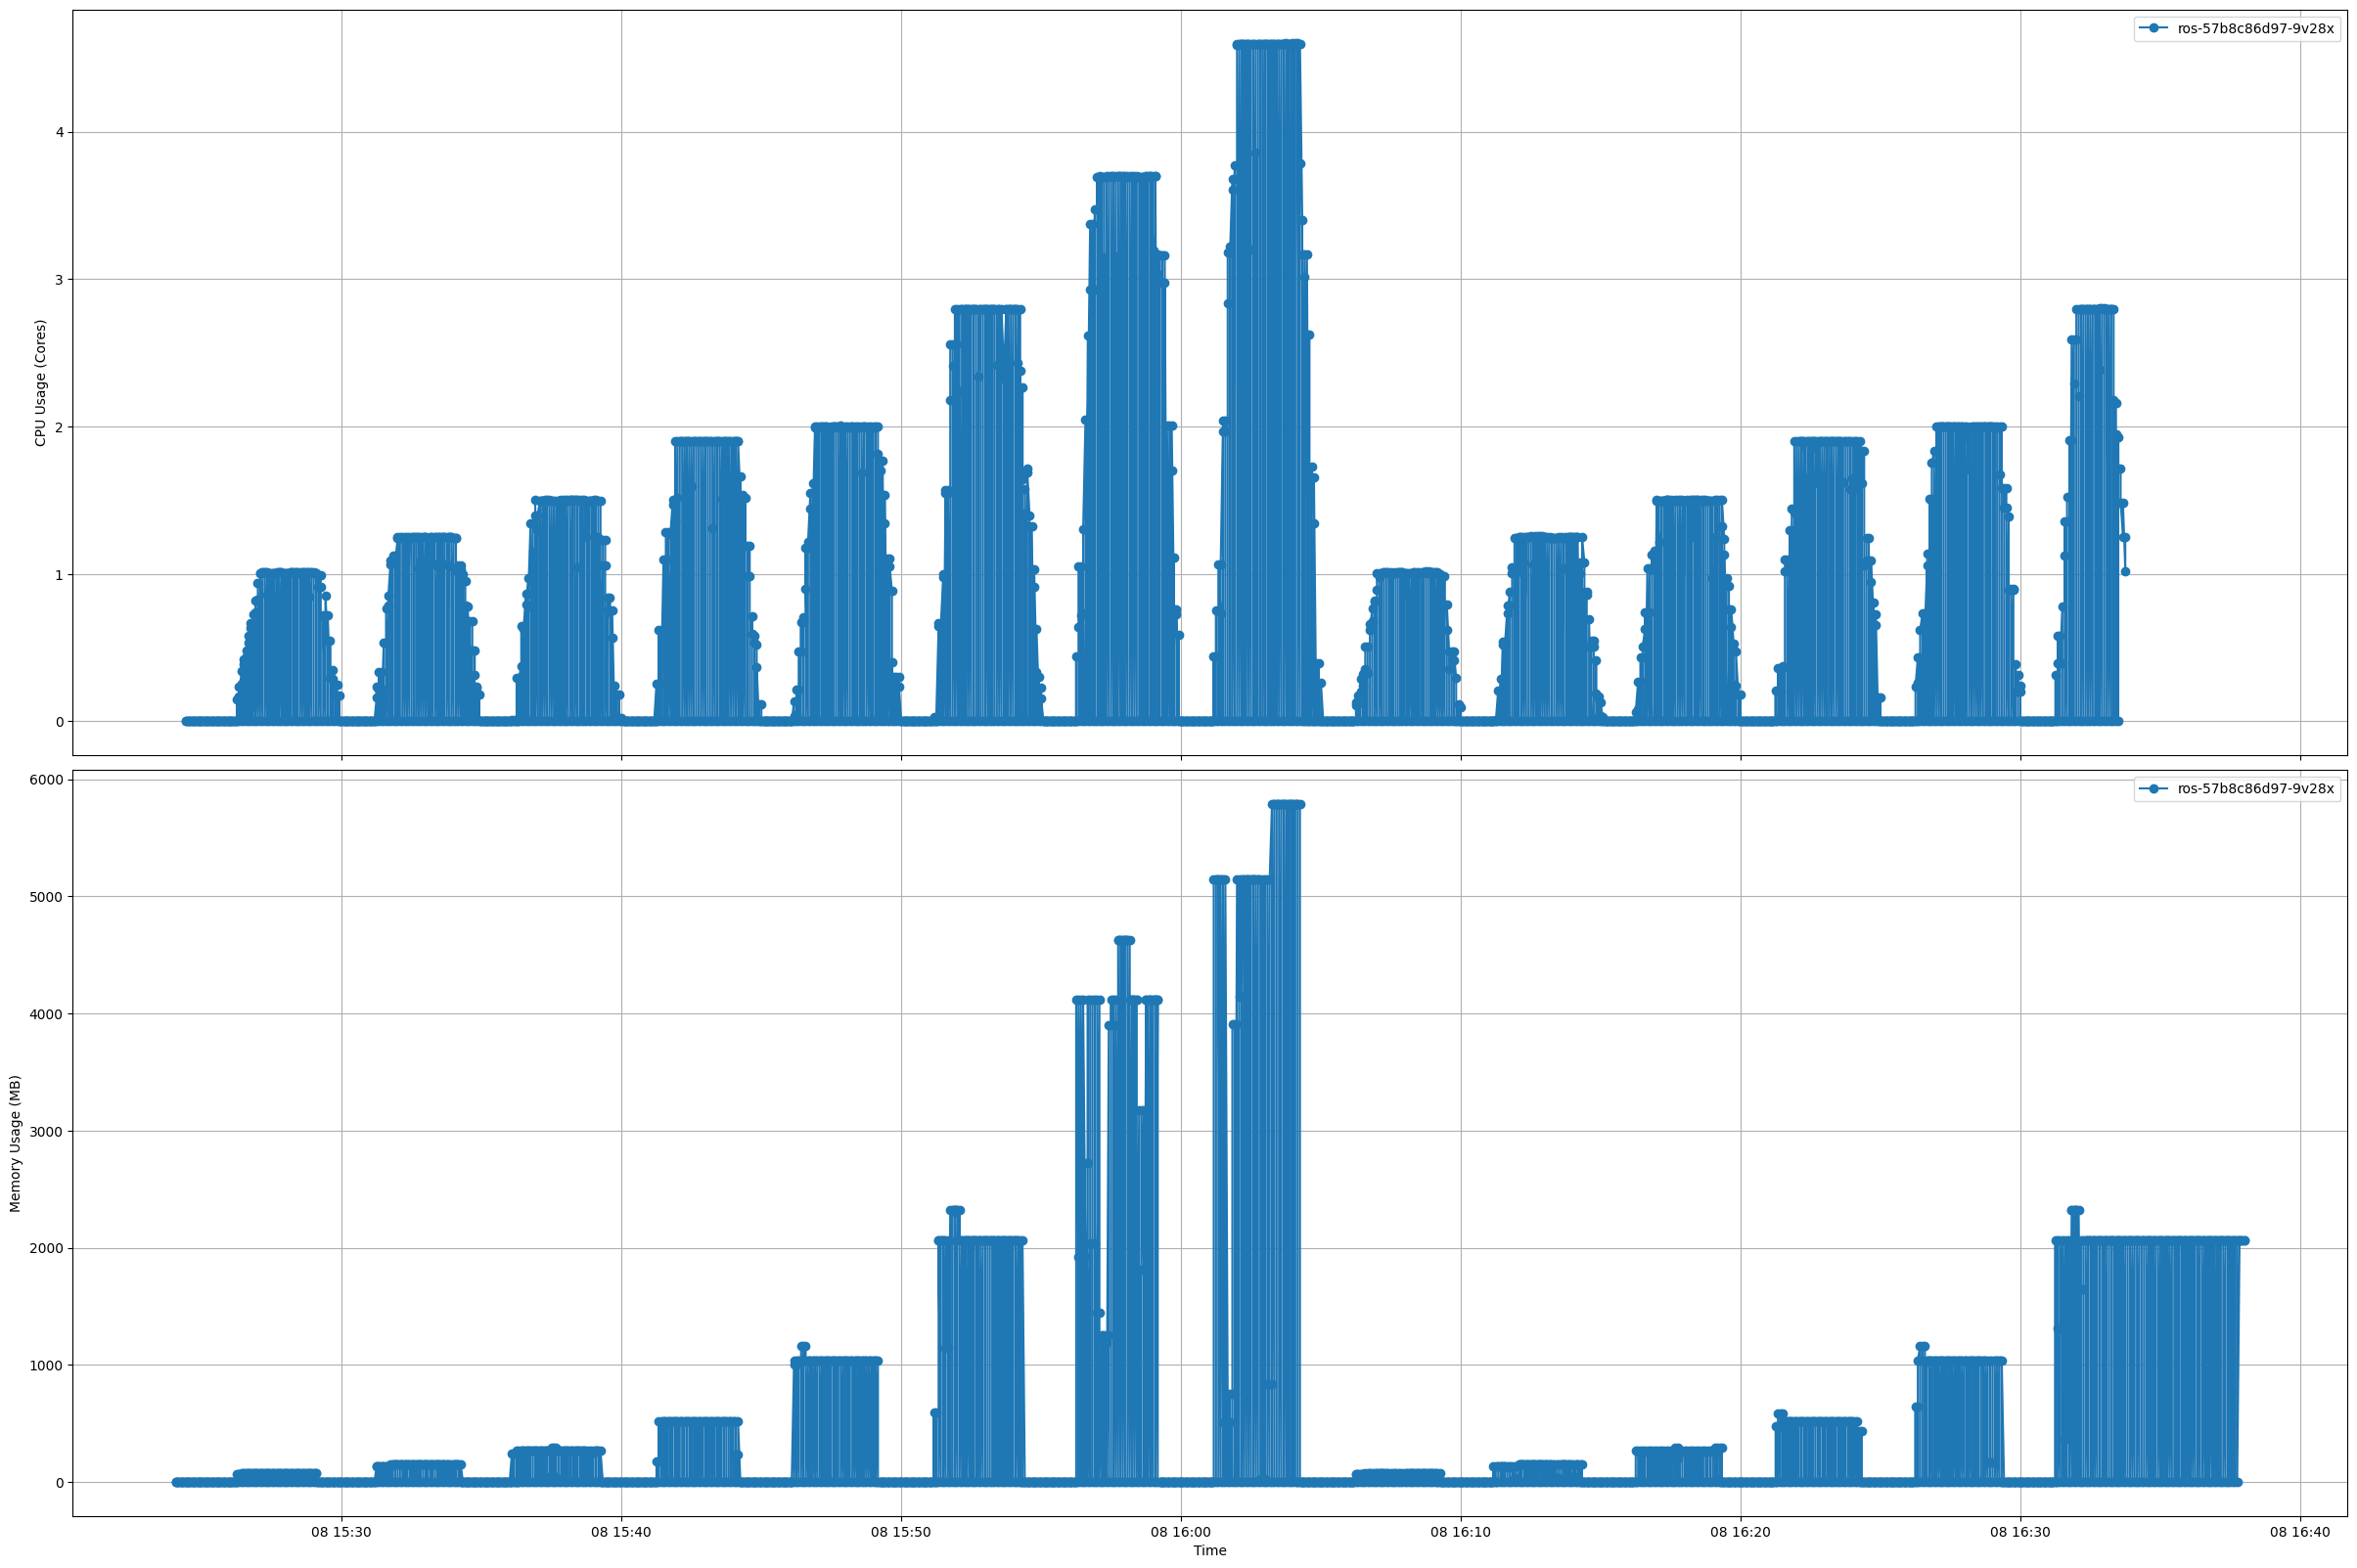

In [273]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Prometheus query URL
prometheus_url = "http://192.168.56.10:30090/api/v1/query_range"




query_mem = 'container_memory_working_set_bytes{namespace="ros", pod=~"ros-.*"}'
query_cpu = 'rate(container_cpu_usage_seconds_total{namespace="ros", pod=~"ros-.*"}[1m])'

start = "2025-01-08T15:21:00Z",  # Adjust to your start time
end =   "2025-01-08T23:00:00Z",    # Adjust to your end time
step =  "5s" # Query interval
# Query parameters
params_mem = {"query": query_mem, "start": start, "end":  end, "step":  step}
params_cpu = {"query": query_cpu, "start": start, "end":  end, "step":  step}

# Make the request
data_mem = requests.get(prometheus_url, params=params_mem).json()
data_cpu = requests.get(prometheus_url, params=params_cpu).json()

# Parse the results
results_mem = data_mem['data']['result']
results_cpu = data_cpu['data']['result']

time_series_mem = []
time_series_cpu = []



for result_mem in results_mem:
    pod_name_mem = result_mem['metric']['pod']
    values_mem = result_mem['values']
    for timestamp_mem, value_mem in values_mem:
        time_series_mem.append({"time": float(timestamp_mem), "memory_usage": float(value_mem) / (1024 * 1024), "pod": pod_name_mem})  # Convert to MB

for result_cpu in results_cpu:
    pod_name_cpu = result_cpu['metric']['pod']
    values_cpu = result_cpu['values']
    for timestamp_cpu, value_cpu in values_cpu:
        time_series_cpu.append({"time": float(timestamp_cpu), "cpu_usage": float(value_cpu), "pod": pod_name_cpu})




# Convert to DataFrame
df_mem = pd.DataFrame(time_series_mem)
df_cpu = pd.DataFrame(time_series_cpu)

df_mem['time'] = pd.to_datetime(df_mem['time'], unit='s')  # Convert to readable timestamps
df_cpu['time'] = pd.to_datetime(df_cpu['time'], unit='s')  # Convert to readable timestamps

# Sort by time
df_mem = df_mem.sort_values(by='time')
df_cpu = df_cpu.sort_values(by='time')

fig, ax = plt.subplots(2, 1, figsize=(30, 20), sharex=True)


for pod_name_cpu, group_cpu in df_cpu.groupby("pod"):
    ax[0].plot(group_cpu['time'], group_cpu['cpu_usage'], label=pod_name_cpu, marker='o', linestyle='-')
for pod_name_mem, group_mem in df_mem.groupby("pod"):
    ax[1].plot(group_mem['time'], group_mem['memory_usage'], label=pod_name_mem, marker='o', linestyle='-')
# ax[0].set_title("Memory Usage of Pods Over Time")
# ax[1].set_title("CPU Usage of Pods Over Time")
ax[1].set_xlabel("Time")


ax[0].set_ylabel("CPU Usage (Cores)")
ax[1].set_ylabel("Memory Usage (MB)")

for i in range(2):
    ax[i].legend()
    ax[i].grid(True)

plt.subplots_adjust(hspace=0.02) 
# save the plot
# plt.savefig('vpa_memory_cpu_usage.pdf', format='pdf', dpi=100, bbox_inches='tight')
plt.show()


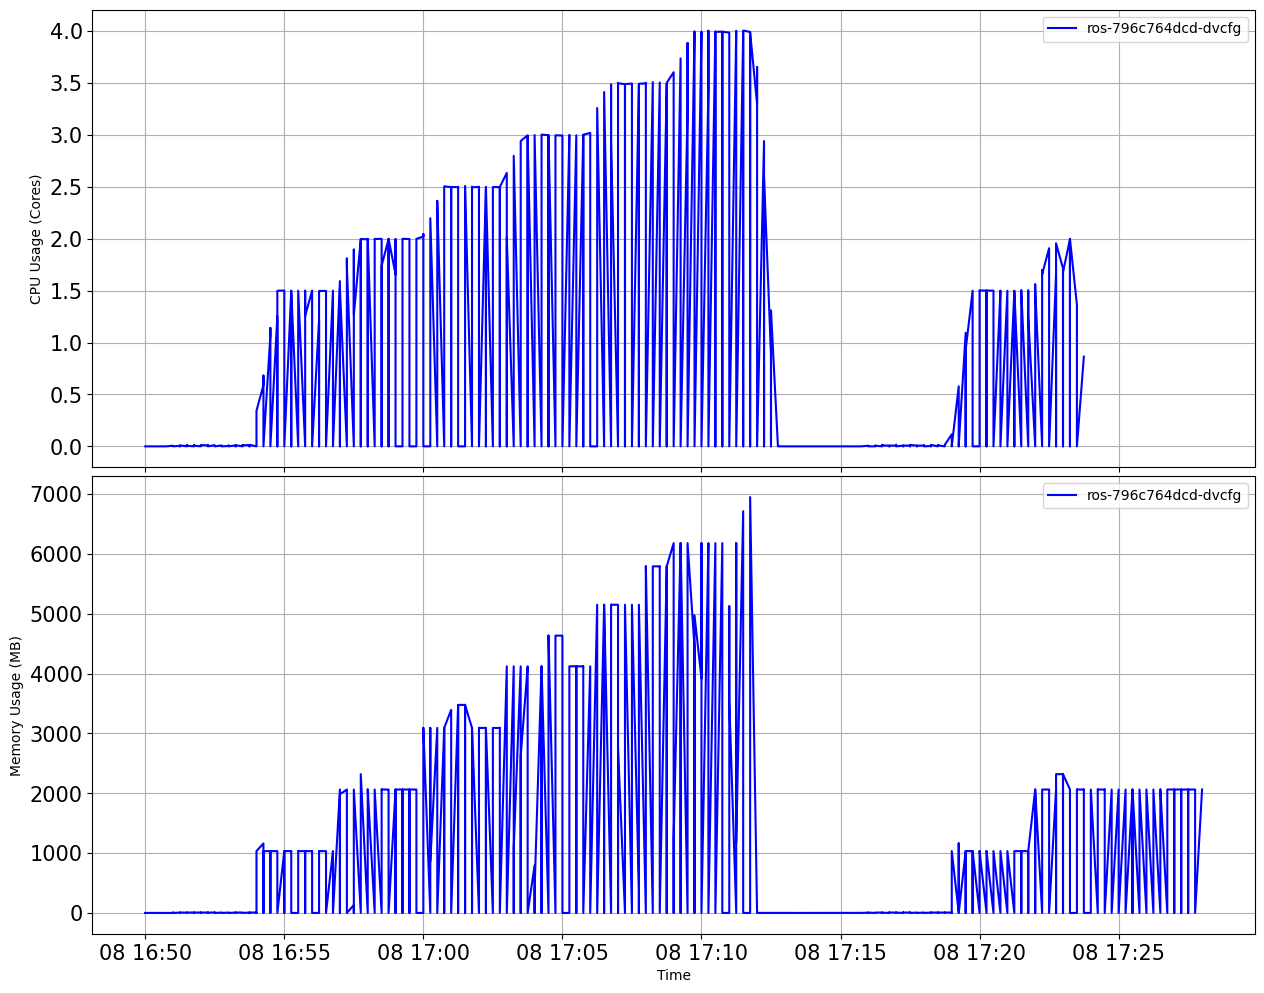

In [337]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Prometheus query URL
prometheus_url = "http://192.168.56.10:30090/api/v1/query_range"




query_mem = 'container_memory_working_set_bytes{namespace="ros", pod=~"ros-.*"}'
query_cpu = 'rate(container_cpu_usage_seconds_total{namespace="ros", pod=~"ros-.*"}[1m])'

start = "2025-01-08T16:50:00Z",  # Adjust to your start time
end =   "2025-01-08T23:00:00Z",    # Adjust to your end time
step =  "15s" # Query interval
# Query parameters
params_mem = {"query": query_mem, "start": start, "end":  end, "step":  step}
params_cpu = {"query": query_cpu, "start": start, "end":  end, "step":  step}

# Make the request
data_mem = requests.get(prometheus_url, params=params_mem).json()
data_cpu = requests.get(prometheus_url, params=params_cpu).json()

# Parse the results
results_mem = data_mem['data']['result']
results_cpu = data_cpu['data']['result']

time_series_mem = []
time_series_cpu = []



for result_mem in results_mem:
    pod_name_mem = result_mem['metric']['pod']
    values_mem = result_mem['values']
    for timestamp_mem, value_mem in values_mem:
        time_series_mem.append({"time": float(timestamp_mem), "memory_usage": float(value_mem) / (1024 * 1024), "pod": pod_name_mem})  # Convert to MB

for result_cpu in results_cpu:
    pod_name_cpu = result_cpu['metric']['pod']
    values_cpu = result_cpu['values']
    for timestamp_cpu, value_cpu in values_cpu:
        time_series_cpu.append({"time": float(timestamp_cpu), "cpu_usage": float(value_cpu), "pod": pod_name_cpu})




# Convert to DataFrame
df_mem = pd.DataFrame(time_series_mem)
df_cpu = pd.DataFrame(time_series_cpu)

df_mem['time'] = pd.to_datetime(df_mem['time'], unit='s')  # Convert to readable timestamps
df_cpu['time'] = pd.to_datetime(df_cpu['time'], unit='s')  # Convert to readable timestamps

# Sort by time
df_mem = df_mem.sort_values(by='time')
df_cpu = df_cpu.sort_values(by='time')

fig, ax = plt.subplots(2, 1, figsize=(15, 12), sharex=True)


for pod_name_cpu, group_cpu in df_cpu.groupby("pod"):
    ax[0].plot(group_cpu['time'], group_cpu['cpu_usage'], label=pod_name_cpu, color='b')
for pod_name_mem, group_mem in df_mem.groupby("pod"):
    ax[1].plot(group_mem['time'], group_mem['memory_usage'], label=pod_name_mem, color='b')
# ax[0].set_title("Memory Usage of Pods Over Time")
# ax[1].set_title("CPU Usage of Pods Over Time")
ax[1].set_xlabel("Time")

# font size  labels

ax[0].set_ylabel("CPU Usage (Cores)",)
ax[1].set_ylabel("Memory Usage (MB)")

for i in range(2):
    ax[i].legend()
    ax[i].grid(True)
    # font size of the ticks
    ax[i].tick_params(axis='both', which='major', labelsize=15)

plt.subplots_adjust(hspace=0.02) 
# save the plot
# plt.savefig('vpa_memory_cpu_usage.pdf', format='pdf', dpi=100, bbox_inches='tight')
plt.show()


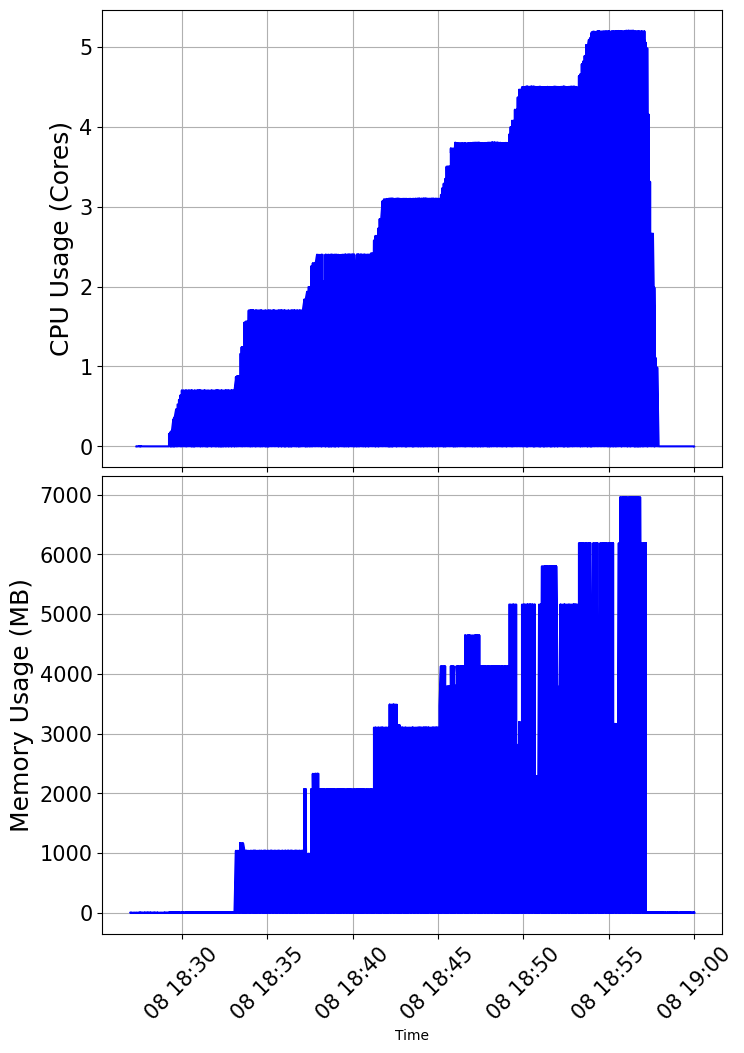

In [21]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Prometheus query URL
prometheus_url = "http://192.168.56.10:30090/api/v1/query_range"




query_mem = 'container_memory_working_set_bytes{namespace="ros", pod=~"ros-.*"}'
query_cpu = 'rate(container_cpu_usage_seconds_total{namespace="ros", pod=~"ros-.*"}[1m])'

start = "2025-01-08T18:10:00Z",  # Adjust to your start time
end =   "2025-01-08T19:00:00Z",    # Adjust to your end time
step =  "5s" # Query interval
# Query parameters
params_mem = {"query": query_mem, "start": start, "end":  end, "step":  step}
params_cpu = {"query": query_cpu, "start": start, "end":  end, "step":  step}

# Make the request
data_mem = requests.get(prometheus_url, params=params_mem).json()
data_cpu = requests.get(prometheus_url, params=params_cpu).json()

# Parse the results
results_mem = data_mem['data']['result']
results_cpu = data_cpu['data']['result']

time_series_mem = []
time_series_cpu = []



for result_mem in results_mem:
    pod_name_mem = result_mem['metric']['pod']
    values_mem = result_mem['values']
    for timestamp_mem, value_mem in values_mem:
        time_series_mem.append({"time": float(timestamp_mem), "memory_usage": float(value_mem) / (1024 * 1024), "pod": pod_name_mem})  # Convert to MB

for result_cpu in results_cpu:
    pod_name_cpu = result_cpu['metric']['pod']
    values_cpu = result_cpu['values']
    for timestamp_cpu, value_cpu in values_cpu:
        time_series_cpu.append({"time": float(timestamp_cpu), "cpu_usage": float(value_cpu), "pod": pod_name_cpu})




# Convert to DataFrame
df_mem = pd.DataFrame(time_series_mem)
df_cpu = pd.DataFrame(time_series_cpu)

df_mem['time'] = pd.to_datetime(df_mem['time'], unit='s')  # Convert to readable timestamps
df_cpu['time'] = pd.to_datetime(df_cpu['time'], unit='s')  # Convert to readable timestamps

# Sort by time
df_mem = df_mem.sort_values(by='time')
df_cpu = df_cpu.sort_values(by='time')

fig, ax = plt.subplots(2, 1, figsize=(8, 12), sharex=True)


for pod_name_cpu, group_cpu in df_cpu.groupby("pod"):
    ax[0].plot(group_cpu['time'], group_cpu['cpu_usage'], label=pod_name_cpu, color='b')
for pod_name_mem, group_mem in df_mem.groupby("pod"):
    ax[1].plot(group_mem['time'], group_mem['memory_usage'], label=pod_name_mem, color='b')
# ax[0].set_title("Memory Usage of Pods Over Time")
# ax[1].set_title("CPU Usage of Pods Over Time")
ax[1].set_xlabel("Time")

# font size  labels

ax[0].set_ylabel("CPU Usage (Cores)", fontsize=18)
ax[1].set_ylabel("Memory Usage (MB)", fontsize=18)

for i in range(2):
    # ax[i].legend()
    ax[i].grid(True)
    # font size of the ticks
    ax[i].tick_params(axis='both', which='major', labelsize=15)
    ax[i].tick_params(axis='x', which='major', rotation=45)


plt.subplots_adjust(hspace=0.02) 
# save the plot
plt.savefig('vpa_memory_cpu_usage.pdf', format='pdf', dpi=100, bbox_inches='tight')
plt.show()


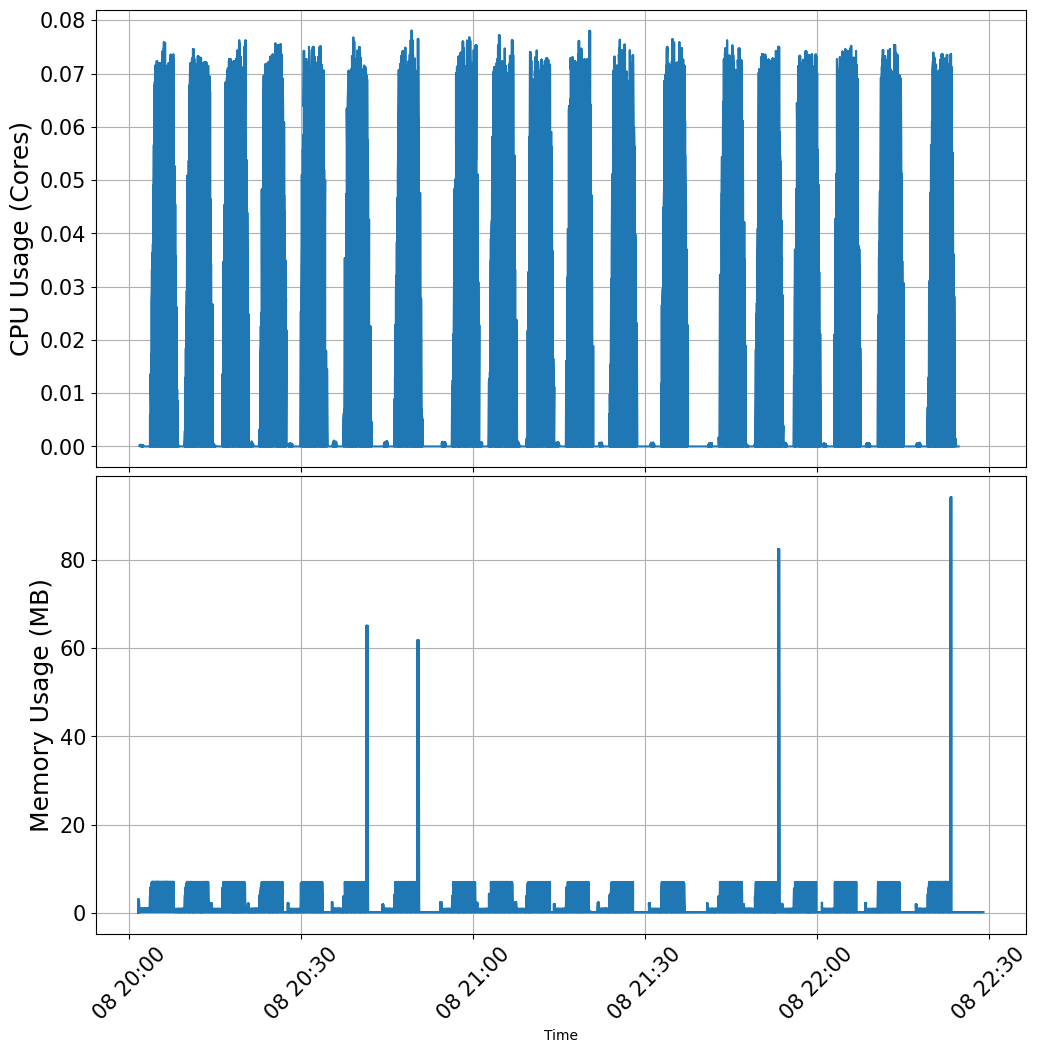

In [22]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Prometheus query URL
prometheus_url = "http://192.168.56.10:30090/api/v1/query_range"




query_mem = 'container_memory_working_set_bytes{namespace="ros", pod=~"ros-.*"}'
query_cpu = 'rate(container_cpu_usage_seconds_total{namespace="ros", pod=~"ros-.*"}[1m])'

start = "2025-01-08T20:00:00Z",  # Adjust to your start time
end =   "2025-01-08T23:00:00Z",    # Adjust to your end time
step =  "5s" # Query interval
# Query parameters
params_mem = {"query": query_mem, "start": start, "end":  end, "step":  step}
params_cpu = {"query": query_cpu, "start": start, "end":  end, "step":  step}

# Make the request
data_mem = requests.get(prometheus_url, params=params_mem).json()
data_cpu = requests.get(prometheus_url, params=params_cpu).json()

# Parse the results
results_mem = data_mem['data']['result']
results_cpu = data_cpu['data']['result']

time_series_mem = []
time_series_cpu = []



for result_mem in results_mem:
    pod_name_mem = result_mem['metric']['pod']
    values_mem = result_mem['values']
    for timestamp_mem, value_mem in values_mem:
        time_series_mem.append({"time": float(timestamp_mem), "memory_usage": float(value_mem) / (1024 * 1024), "pod": pod_name_mem})  # Convert to MB

for result_cpu in results_cpu:
    pod_name_cpu = result_cpu['metric']['pod']
    values_cpu = result_cpu['values']
    for timestamp_cpu, value_cpu in values_cpu:
        time_series_cpu.append({"time": float(timestamp_cpu), "cpu_usage": float(value_cpu), "pod": pod_name_cpu})




# Convert to DataFrame
df_mem = pd.DataFrame(time_series_mem)
df_cpu = pd.DataFrame(time_series_cpu)

df_mem['time'] = pd.to_datetime(df_mem['time'], unit='s')  # Convert to readable timestamps
df_cpu['time'] = pd.to_datetime(df_cpu['time'], unit='s')  # Convert to readable timestamps

# Sort by time
df_mem = df_mem.sort_values(by='time')
df_cpu = df_cpu.sort_values(by='time')

fig, ax = plt.subplots(2, 1, figsize=(12, 12), sharex=True)


for pod_name_cpu, group_cpu in df_cpu.groupby("pod"):
    ax[0].plot(group_cpu['time'], group_cpu['cpu_usage'], label=pod_name_cpu)
for pod_name_mem, group_mem in df_mem.groupby("pod"):
    ax[1].plot(group_mem['time'], group_mem['memory_usage'], label=pod_name_mem)
# ax[0].set_title("Memory Usage of Pods Over Time")
# ax[1].set_title("CPU Usage of Pods Over Time")
ax[1].set_xlabel("Time")

# font size  labels

ax[0].set_ylabel("CPU Usage (Cores)", fontsize=18)
ax[1].set_ylabel("Memory Usage (MB)", fontsize=18)

for i in range(2):
    # ax[i].legend()
    ax[i].grid(True)
    # font size of the ticks
    ax[i].tick_params(axis='both', which='major', labelsize=15)
    ax[i].tick_params(axis='x', which='major', rotation=45)


plt.subplots_adjust(hspace=0.02) 
# save the plot
# plt.savefig('vpa_memory_cpu_usage.pdf', format='pdf', dpi=100, bbox_inches='tight')
plt.show()


In [21]:
import requests
import json

def query_prometheus(prometheus_url, query):
    """
    Query the Prometheus API.

    Args:
        prometheus_url (str): Base URL of the Prometheus server (e.g., http://<prometheus-server>:9090).
        query (str): PromQL query to execute.

    Returns:
        dict: JSON response from Prometheus.
    """
    response = requests.get(f"{prometheus_url}/api/v1/query", params={"query": query})
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception(f"Error querying Prometheus: {response.status_code}, {response.text}")

def get_resource_requests(prometheus_url, namespace, pod_name):
    """
    Get CPU and memory resource requests for a specific pod in a namespace.

    Args:
        prometheus_url (str): Base URL of the Prometheus server.
        namespace (str): Kubernetes namespace of the pod.
        pod_name (str): Name of the pod.

    Returns:
        dict: Dictionary containing CPU and memory requests.
    """
    cpu_query = f"kube_pod_container_resource_requests_cpu_cores{{namespace=\"{namespace}\", pod=\"{pod_name}\"}}"
    memory_query = f"kube_pod_container_resource_requests_memory_bytes{{namespace=\"{namespace}\", pod=\"{pod_name}\"}}"

    cpu_response = query_prometheus(prometheus_url, cpu_query)
    memory_response = query_prometheus(prometheus_url, memory_query)

    cpu_requests = [float(result['value'][1]) for result in cpu_response['data']['result']]
    memory_requests = [int(result['value'][1]) for result in memory_response['data']['result']]

    return {
        "cpu_requests": cpu_requests,
        "memory_requests": memory_requests
    }

if __name__ == "__main__":
    import requests
    import pandas as pd
    import matplotlib.pyplot as plt

# Prometheus query URL
    PROMETHEUS_URL = "http://192.168.56.10:30090"  # Replace with your Prometheus server URL
    NAMESPACE = "ros"  # Replace with your namespace
    POD_NAME = "ros-5f567c5ddf-2z4mz"  # Replace with your pod name

    try:
        resource_requests = get_resource_requests(PROMETHEUS_URL, NAMESPACE, POD_NAME)
        print("Resource Requests:")
        print(json.dumps(resource_requests, indent=4))
    except Exception as e:
        print(f"Error: {e}")


Resource Requests:
{
    "cpu_requests": [],
    "memory_requests": []
}
